## Notebook 3: Cosmological parameters
___

#### This notebook is adapted from the course textbook:
#### Machine Learning for Physics and Astronomy by Viviana Acquaviva


---



#### Please upload your completed notebook to Canvas as an .ipynb file
#### Title the file as: LastName_notebook3.ipynb

### Original work statement:

Please write your name and the names of your collaborators in this cell.

Please be sure to cite sources along the way as appropriate.

### Your name:
#### Collaborators:

You can edit this notebook directly by adding code and text cells as needed. As always, begin by importing the necessary packages.


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Visulaizing data with error bars

#### 1a. Import the data from the file sn_data.txt

This data set contains three columns.

The first column is the cosmological redshift (z) of the supernovae. Cosmological redshift is a unitless measure of very large distances that takes into consideration the motion of the object away from us (or expansion of the space between objects). Redshift 0, z = 0, is our local universe at present day. Increasing cosmological redshift represents our universe as we move further back in time, where we today are increasingly further away from objects at increasing redshift.

The second column is the luminosity distance to the supernovae, expressed in the units of Mpc (megaparsec). Mega = 1 Million; 1 parsec (pc) = 3.26 light years.

The third column contains the error on the luminosity distance, again expressed in Mpc.

In [ ]:
data= np.loadtxt('sn_data.txt', skiprows=1)
data.shape

(206, 3)

#### 1b. Make an errorbar plot of this data set.

Place redshift (z) on the x-axis, luminosity distance on the y-axis, and use error on the luminosity distance. Add labels to the axes and don't forget the units where appropriate

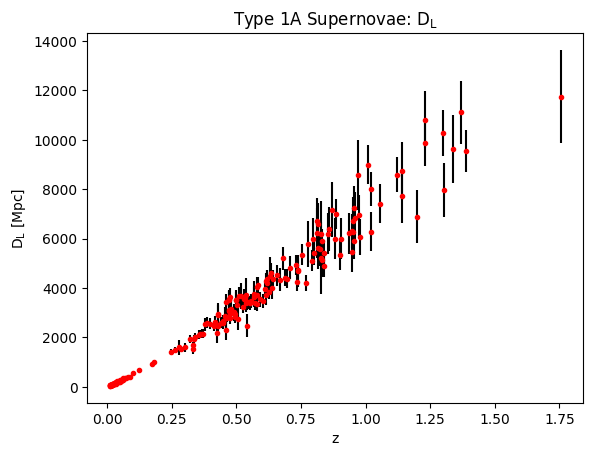

In [ ]:
z_array  = data[:,0]
y_array  = data[:,1]
dy_array =data[:,2]
plt.xlabel('z')
plt.ylabel(r'${\rm D_L}$ [Mpc]')
plt.title(r'Type 1A Supernovae: ${\rm D_L}$')
plt.errorbar(z_array,y_array,yerr=dy_array, fmt='.', color='r', ecolor='k');

#### 1c. Describe the trend that you see.

As the redshift of type 1A supernovae increase, the luminosity distance also increases. Furthermore as the redshift increases, the error on the luminosity distance measurement also increases.

# Problem 2: Modeling data with a function

#### A few words on our model

The plot that you just made just shows the data. Now we want to build different models for the luminosity distance of these supernovae, and then choose the model that best describes the data.

Our model for the Luminosity Distance is a function of different parameters:

- z (the redshift) is the independent variable; in other words, our model will return a luminosity distance for any redshift value.

- $\Omega_{\rm m}$ is a cosmological parameter that describes the fraction of total matter in the universe, and it's a number between 0 and 1;

- $\Omega_{\Lambda}$ is a cosmological parameter that describes the fraction of dark energy in the universe; we can assume that $\Omega_{\rm m} + \Omega_{\Lambda}$ = 1 (so in our models the universe only contains matter and dark energy), which simplifies our model and we can use $\Omega_{\Lambda} = 1 - \Omega_{\rm m}$ in our function;

- $H_0$ is the Hubble constant, a cosmological parameter which gives the current rate of expansion of the universe; we will fix it in the beginning to be $H_0$ = 70 km/s/Mpc;

- ($1+z_f$) is a constant. It is essentially the inverse scale factor $a^{-1}$. $z_f$ (stands for z final) is also the upper limit of the integral. In other words, we will integrate from 0 to a value for $z_f$, and use that upper $z_f$ value for our scale factor.

- c is the speed of light in km/s; $c = 2.99 \times 10^5$. This is a constant of nature so we won't need to change it in our model.

Here comes our model:


\begin{align}
D_L(z,\Omega_{\rm m}) = \,(1+z_f) \frac{c}{H_0}\int_0^{z_f} \frac{dz}{\sqrt{\Omega_{\rm m}(1+z)^3 + \Omega_{\Lambda}}}
\end{align}

In case it's hard to see, everything in the denominator of the integrand is inside a "squre-root".

#### 2a. Define the function.

Notes:

i. $\Omega_{\Lambda}$ is not a parameter of the function, so make sure you write $\Omega_{\Lambda}$ in terms of $\Omega_{\rm m}$ only in the function.

ii. First define a function for the integrand. This will be passed to another function that performs the integral. Recall the scipy.integrate.quad function of the scipy package from our class notebook.
       
https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/integrate.html


**hint: you may want to start your first function as something like:
       
def LumDist_integrand(z, zf, Omega_m, H0 = 70, ckms = 2.9979 $\times 10^5$) :


In [ ]:
from scipy.integrate import quad

In [ ]:
def LumDist_integrand(z, zf, Omegam, H0 = 70, ckms= 2.9979e5,):
    '''
    This function defines the integrand of the luminosity distance function.
    It is to be passed to a numerical integration function.
    '''
    return (1+zf)*(ckms/H0)/np.sqrt((Omegam*((1+z)**3) + (1-Omegam)))

In [ ]:
def LumDist(zf, Omegam):
    '''
    This performs the intergation of the luminosity distance function.
    The luminosity distance integrand function is nested in the scipy.quad function.

    parameters:
    -----------
    zf:     float (the redshift upper limit of the integral)
    Omegam: float (the value of Omega_matter)

    returns:
    --------
    luminsoity distance: float (the luminosity distance in units of Mpc)
    '''
    return quad(LumDist_integrand, 0, zf, args=(zf, Omegam))[0]

#### 2b. Answer the following:
What are the arguments of the LumDist_inregrand function? Which ones have default values?
#### 2c. Sanity Check:
Test your integrated luminosity function for the following inputs:\
zf=1.0, $\Omega_{\rm m}$=0.7 gives a luminosity distance ~ 5512\
zf=0.5, $\Omega_{\rm m}$=0.7 gives a luminosity distance ~ 2522

2b. The arguments of LumDist are zf ( which is both the upper limit of integration and for use in the scale factor) and Omega_m (the fraction of matter in the universe). Nested are the arguments z (the variable of integration),  H0 (the Hubble constant), and ckms (the speed of light in km/s). The Hubble Constant and the speed of light have default values.

In [ ]:
#2c.
print(LumDist(1, 0.7))
print(LumDist(0.5, 0.7))

5512.274175117098
2521.9714288948917


#### 2d. Vectorize the function.
Vectorize the luminosity distance function so we can pass it a 1D array of redshifts as input. We can typically pass an array directly to a function, but since we are integrating, we need to vectorize the function first. Check that it works by passing a numpy array of the supernova redshift data to your function.

In [ ]:
### numpy vectorize will vectorize my function

### create an object that will store the outputs from the vectorized function
vec_LumDist = np.vectorize(LumDist)

### check: pass the array of redshifts for omega_m=0.7
vec_LumDist(z_array, 0.7).shape

(206,)

#### 2e. Calculate and plot the models

In the same figure, plot the supernovae data with error bars as before, and overlay the luminosity distance values for the supernovae predicted by these three models:
    
Model 1: $\Omega_{\rm m} = 0.0$
    
Model 2: $\Omega_{\rm m} = 0.3$
    
Model 3: $\Omega_{\rm m} = 1.0$

Make sure you add labels for the models and the data points and to include a legend!

In [ ]:
LD_1 = vec_LumDist(z_array, 0)
LD_2 = vec_LumDist(z_array, 0.3)
LD_3 = vec_LumDist(z_array, 1)

In [ ]:
LD_1.shape

(206,)

In [ ]:
z_array.shape

(206,)

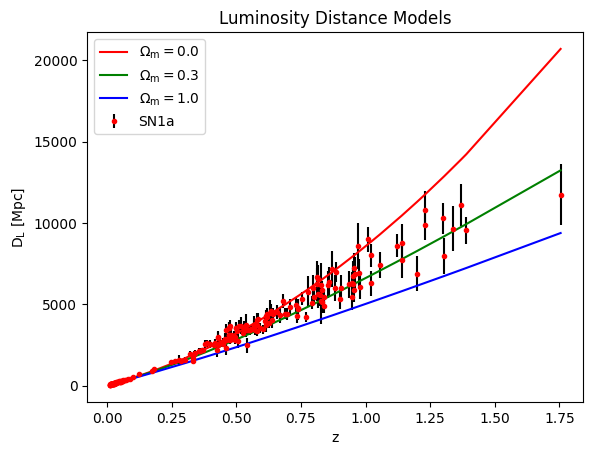

In [ ]:
plt.xlabel('z')
plt.ylabel(r'${\rm D_L}$ [Mpc]')
plt.title('Luminosity Distance Models')
plt.errorbar(z_array,y_array,yerr=dy_array, fmt='.', color='r', ecolor='k', label='SN1a')
plt.plot(z_array,LD_1, color='r', label=r'$\Omega_{\rm m} = 0.0$')
plt.plot(z_array,LD_2, color='g', label=r'$\Omega_{\rm m} = 0.3$')
plt.plot(z_array,LD_3, color='b', label=r'$\Omega_{\rm m} = 1.0$')
plt.legend();

#### 2f. Answer the following questions:

i. What are the $\Omega_{\Lambda}$ values for the above models? Which model contains no dark energy at all?

ii. Judging by eye, which model seems to be the best fit to the data and why?


i.
For the top model, Omega_Lam = 1-0 = 1 = 100%.
For the middle model, Omega_Lam = 1-0.3 = 0.7 = 70%.
For the bottom model, Omega_Lam = 1-1 = 0 = 0%, this is the model that contains no dark energy at all.

ii.
The middle model, which contains 70% dark energy, seems to be the best fit by visual observation as it seems to include most of the data points and/or passes through most error bars.

# Problem 3: Evaluating the models

Now we will define a function to evaluate how well the models fit the data. This is done through the  reduced $\chi^2$ (we will just call this $\chi^2$, "chi squared") function, that we mentioned in the "Fitting a line" class notebook.

#### 3a. Write a function that computes the reduced $\chi^2$.
The function will take three arrays as input.
1. an array containing the measured distances of the supernovae, $y$
2. an array of model predictions, $\hat{y}$  ("y-hat")
3. another array containing the measured errors, $\sigma$

The formula is:

$$ \chi^2 = \sum_i \frac{(y_i-\hat{y_i})^2}{\sigma
_i^2}$$
    
   

In [ ]:
def chi2(obs, obs_err, model_pred):
    '''
    This function calculates the reduced chi-square score between arrays of
    measured values (observed values) and model predictions (expected values)
    with variance given by errors.

    parameters:
    -----------
    obs:        float or array of floats (the measured values)
    obs_err:    float or array of floats (the error on the measurements)
    model_pred: float or array of floats (the predicted, or expected, values per the model)

    returns:
    --------
    chi-square score: float
    '''
    return np.sum(((obs - model_pred)**2)/obs_err**2)

#### 3b. Calculate the $\chi^2$ of your models from problem 2e.
What are $\chi^2$ scores? Which is evaluated as the best model?

(Hint: your model prediction array is the vector of luminosity distances for all the supernovae)

In [ ]:
### the scores are:
print(chi2(y_array, dy_array, LD_1))
print(chi2(y_array, dy_array, LD_2))
print(chi2(y_array, dy_array, LD_3))

447.819511037873
308.1221776880534
1142.2432142471705


The middle model with omega_m is also evaluated as the best model by way of lowest chi_2 score.

#### 3c. Calculate and store the $\chi^2$ values for different models with values of $\Omega_{\rm m}$ between 0 and 1, spaced every 0.05.

** Hint: Begin by creating an array that holds the $\Omega_{\rm m}$ values. Then you will want to create a variable to store all the $\chi^2$ values.

In [ ]:
omegam_array= np.arange(0,1.05,0.05)
omegam_array

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
### create an array to hold the luminosity distances
### this will be a 2-dimensional array with ixk dimensions
### dimension i will be the same size as omega_m array
### dimension k will be the same size as as the z_array
LD_om_array=np.zeros((omegam_array.shape[0], z_array.shape[0]), dtype=float)

### iterate through all Omega_m values in omega_array
for i, om in enumerate(omegam_array):
    ### pass the z_array to the vectorized lum. distance function and store the distances
    LD_om_array[i] = vec_LumDist(z_array, om)

In [ ]:
### create an array of chi-square scores by iterating through every row in the
### luminosity distance array and calculating the chi-square score in each row
chi_scores = np.zeros(LD_om_array.shape[0])
for i, row in enumerate(LD_om_array):
  chi_scores[i] = chi2(y_array, dy_array, row)

#### 3d. Create a scatter plot that has the values of $\Omega_{\rm m}$ on the x-axis, and the value of the $\chi^2$ on the y axis.

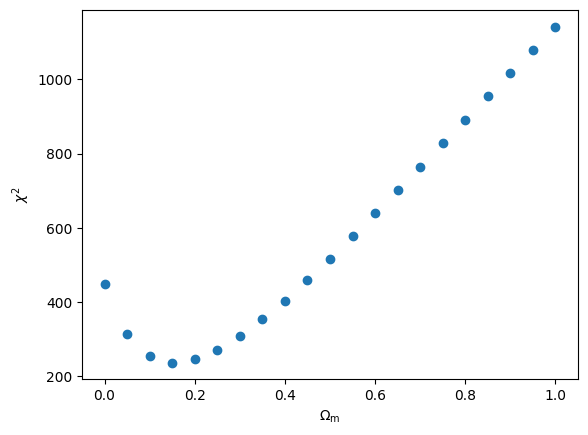

In [ ]:
plt.xlabel(r'$\Omega_{\rm m}$')
plt.ylabel(r'$\chi^2$')
plt.scatter(omegam_array, chi_scores)

#### 3e. Find the model with the lowest $\chi^2$ and answer the questions:

i. Which value of $\Omega_{\rm m}$ corresponds to this model?

ii. Which value of $\Omega_{\Lambda}$ corresponds to this model?

iii. Based on your answers, is a non-zero value of dark energy supported by the data?

In [ ]:
### let's get the index of the lowest chi-square score
print(chi_scores.min())
print(chi_scores.argmin())

237.2095959417074
3


In [ ]:
### index 3 gives the lowest ch_sqare score
### let's find which Omega_m value is at index 3
omegam_array[3]

np.float64(0.15000000000000002)

i.
Index 3 has the lowest chi^2, which would correspond to an Omega_m value of 0.15

ii.
Omega_Lam would then be, 1- 0.15 = 0.85= 85% dark dnergy

iii.
Yes, the data strongly suggests that not only is a non-zero value of dark energy in the universe supported, but it is highly probable that there is significantly more dark dnergy than total matter in the universe.

# Problem 4 (challenge): Multi-parameter model

#### 4a. Repeat the $\chi^2$ analysis for a  multi-parameter model:
Start by creating a function for a model that includes $H_0$.

\begin{align}
D_L(z,\Omega_{\rm m}, H_0) = \,(1+z_f) \frac{c}{H_0}\int_0^{z_f} \frac{dz}{\sqrt{\Omega_{\rm m}(1+z)^3 + \Omega_{\Lambda}}}
\end{align}

Then create an array for $\Omega_{\rm m}$ varying between 0 and 1 in 0.05 intervals and one for $H_0$, the Hubble constant, varying between 50 and 80 km/s/Mpc in intervals of 5 km/s/Mpc. Pass these to your multi-parameter model


In [ ]:
def LumDist_multi_integrand(z, zf, Omegam, H0, ckms= 2.9979e5,):
    '''
    This is the same as the first LumDist_integrand function but now
    it will also take a value of H0 as an input.
    '''
    return (1+zf)*(ckms/H0)/np.sqrt((Omegam*((1+z)**3) + (1-Omegam)))

In [ ]:
def LumDist_multi(y, Omegam, H0):
    '''
    This is the same as the first LumDist function but now
    it will also take a value of H0 as an input.
    '''
    return quad(LumDist_multi_integrand, 0, y, args=(y, Omegam, H0))[0]

In [ ]:
### vectorize the function
vec_LumDist_multi = np.vectorize(LumDist_multi)

In [ ]:
### we already have the array of omega_m let's create an array of H0 values
hubble_array= np.arange(50,81, 5)
hubble_array

array([50, 55, 60, 65, 70, 75, 80])

In [ ]:
### create an 3-dimenional array to hold the luminosity distances
### it will have dimensions i x j x k
### dimension i will be the same size as the omegam_array
### dimension i will contain j x k arrays, where j will be the same size as hubble_array
### and dimension k will be the size of z_array
LD_om_H0_array=np.zeros((omegam_array.shape[0], hubble_array.shape[0], z_array.shape[0]))

### iterate through all Omega_m values in omegam_array
for i, om in enumerate(omegam_array):
    ### for every Omega_m value, iterate through every H0 value and get the lum. distances
    for j, h in enumerate(hubble_array):
        LD_om_H0_array[i,j] = vec_LumDist_multi(z_array, om, h)

In [ ]:
### create an array to store the chi_square scores
### these scores will be for the luminosity distances with varying Omega_m and H0 values
### therefore it needs to be a two-dimesional array with dimensions ixj
### dimension i will be the size as omegam_array
### dimension j will be the size as hubble_array
chi_scores_multi = np.zeros((omegam_array.shape[0], hubble_array.shape[0]))

### iterate through every array of luminosity distances that has one value of Omega_m
for i, D in enumerate(LD_om_H0_array):
    ### now iterate through every row of each D, where every row has a different value of H0
    ### and calculate the chi-square scores for that row
    for j, row in enumerate(D):
        chi_scores_multi[i][j] = chi2(y_array, dy_array, row)


#### 4b. What are the values of $\Omega_{\rm m}$ and $H_0$ that correspond to the lowest $\chi^2$ in this multi-parameter model?
How do your conclusions change in this case?

In [ ]:
# get the indeces for Omega_m and H0 that correspond to lowest chi^2
inds = np.unravel_index(np.argmin(chi_scores_multi, axis=None), chi_scores_multi.shape)

In [ ]:
omegam_array[inds[0]]

np.float64(0.30000000000000004)

In [ ]:
hubble_array[inds[1]]

np.int64(65)

The index for Omega_m that corresponded to lowest chi^2 was and that which corresponded to H0 was index 3. Using these indeces to retrieve the values from the arrays we obtained Omega_m = 0.3, HO= 65.

This shows that the amount of dark energy and matter in the universe depends also on the Hubble constant. We obtained an even lower chi squared value with a Hubble contsant of 65 than with one of 70. This model indicates a universe with 30% total matter and 70% dark energy.

#### 4c. plot and compare the best modles
In the same figure, plot the supernovae data with error bars as before, and overlay your best model from problem 2e., your best model from problem 3e. and your best multi-parameter model. Label each model with the value it had for $\Omega_{\rm m}$ and $H_0$.

In [ ]:
LD_multiparam = vec_LumDist_multi(z_array, 0.3, 65)
LD_2param = vec_LumDist(z_array,0.15)

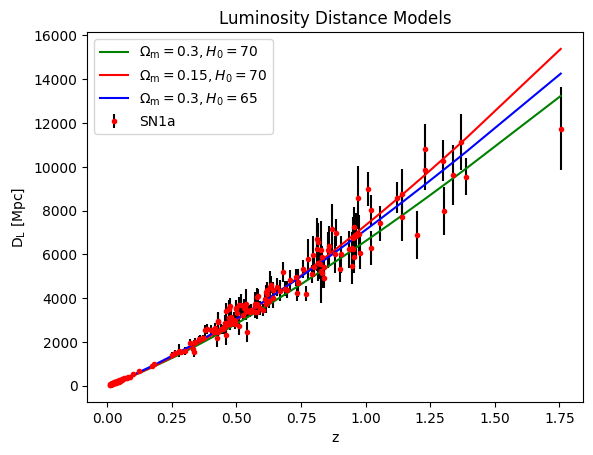

In [ ]:
plt.xlabel('z')
plt.ylabel(r'${\rm D_L}$ [Mpc]')
plt.title('Luminosity Distance Models')
plt.errorbar(z_array,y_array,yerr=dy_array, fmt='.', color='r', ecolor='k', label='SN1a')
plt.plot(z_array, LD_2, color='g', label=r'$\Omega_{\rm m} = 0.3, H_0=70$')
plt.plot(z_array, LD_2param, color='r', label=r'$\Omega_{\rm m} = 0.15, H_0=70$')
plt.plot(z_array, LD_multiparam, color='b', label=r'$\Omega_{\rm m} = 0.3, H_0=65$')
plt.legend();

#### 4e. Visually inspect your best models.
Why do think it's important to use a statistical evaluation method such as the $\chi^2$ score when comparing models in addition to your own inspection?

The statistical evaluation picks up on nuances in the data that we may not. So it's important to use a statistical method to quantataively evaluate our models in order to make an informed decision about a best model. It's also important to inspect our models on our own so we can interpret the trends and make conclusions about results. For instance, we see that the highest redshift data point is alone and has a large error bar compered to rest of the data points. It is possible that this data point is an outlier in the data. Without more high redshift data, it's difficult to determine whether or not this data point should be included in the model.